# Spectrogram classification Î™®Îç∏ Íµ¨ÌòÑ

### Î™©Ìëú
---
2Ï∞®Ïõê Spectrogram Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•Î∞õÏïÑ Text ÎùºÎ≤®ÏùÑ Ï∂úÎ†•ÌïòÎäî Î™®Îç∏ÏùÑ Í∏∞Î≥∏Î≤ÑÏ†ÑÍ≥º Skip-connection Î≤ÑÏ†ÑÏúºÎ°ú ÎÇòÎâòÏñ¥ ÌïôÏäµÏãúÏºúÎ≥∏Îã§.

## ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
---

In [15]:
delete_vals()

### Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ÏôÄ Î∂ÑÎ•ò

- Ï†ÄÏû•Îêú ÏùåÏÑ± Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [16]:
speech_data = load_data()

DATA_AMOUNT = 50000
wav_vals = speech_data["wav_vals"][:DATA_AMOUNT]
label_vals = speech_data["label_vals"][:DATA_AMOUNT]

- Spectrogram ÏÉùÏÑ±

In [17]:
spec_vals = np.array([ wav2spec(wav) for wav in wav_vals ])

(50000, 130, 126)


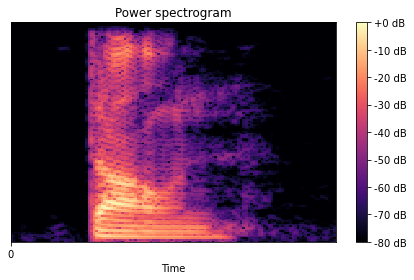

In [18]:
print(spec_vals.shape)
show_spectrogram(spec_vals[60])

#### ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ÌïòÍ∏∞

In [19]:
label_value, label_data = get_label_data(label_vals)

In [20]:
label_data

array([ 3,  3,  3, ..., 11, 11, 11])

#### sklearnÏùò train_test_splitÌï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ train, test Î∂ÑÎ¶¨

In [21]:
from sklearn.model_selection import train_test_split

train_spec, test_spec, train_label, test_label = train_test_split(spec_vals, 
                                                                  label_data, 
                                                                  test_size=0.2,
                                                                  shuffle=True)

train_spec = train_spec.reshape([-1, 130, 126, 1]) # add channel for CNN
test_spec = test_spec.reshape([-1,  130, 126, 1])

In [22]:
print("train data : ", train_spec.shape)
print("train labels : ", train_label.shape)
print("test data : ", test_spec.shape)
print("test labels : ", test_label.shape)

train data :  (40000, 130, 126, 1)
train labels :  (40000,)
test data :  (10000, 130, 126, 1)
test labels :  (10000,)


In [53]:
test_spec[0]

array([[[7.2873267e-04],
        [5.3130696e-04],
        [9.9507815e-06],
        ...,
        [3.0216143e-02],
        [3.6090055e-01],
        [6.9839555e-01]],

       [[7.4979797e-04],
        [2.4998267e-04],
        [2.9223293e-04],
        ...,
        [1.2002578e-01],
        [4.7989976e-01],
        [7.8378719e-01]],

       [[6.2743889e-04],
        [7.8956760e-04],
        [1.0085087e-03],
        ...,
        [1.5542549e-01],
        [8.5403806e-01],
        [2.0278819e+00]],

       ...,

       [[2.3692324e-05],
        [1.3074941e-05],
        [5.5062865e-06],
        ...,
        [3.1193448e-04],
        [1.1258192e-03],
        [7.0366712e-04]],

       [[2.2257904e-05],
        [1.0339760e-05],
        [2.6170187e-06],
        ...,
        [2.0119606e-04],
        [7.8241434e-04],
        [8.1444369e-04]],

       [[2.0460160e-05],
        [1.0663136e-05],
        [1.3362192e-06],
        ...,
        [1.7405688e-04],
        [8.7783579e-04],
        [1.3776519e-03]]

In [55]:
spec_vals[0].shape

(130, 126)

### ÌïôÏäµÏùÑ ÏúÑÌïú ÌïòÏù¥Ìçº ÌååÎ¶¨ÎØ∏ÌÑ∞ ÏÑ§Ï†ï

In [23]:
batch_size = 32
max_epochs = 10

### Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±


In [24]:
import tensorflow as tf

train_dataset = get_dataset(train_spec, train_label, batch_size)
test_dataset = get_dataset(test_spec, test_label, batch_size)
print(train_dataset)
print(test_dataset)

<BatchDataset shapes: ((None, 130, 126, 1), (None, 12)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 130, 126, 1), (None, 12)), types: (tf.float32, tf.float32)>


## Î™®Îç∏ Íµ¨ÏÑ± Î∞è ÌïôÏäµ
---

### 2Ï∞®Ïõê Spectrogram Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî Î™®Îç∏ Íµ¨ÏÑ±

- Í∏∞Î≥∏ Î≤ÑÏ†Ñ Î™®Îç∏

In [25]:
class BasicModel(Model):
    def __init__(self, batch_size, max_epochs, checkpoint_dir):
        Model.__init__(self, batch_size, max_epochs, checkpoint_dir)
        self.set_model()
        
    def set_model(self):
        input_tensor = layers.Input(shape=self.input_data_shape)
        
        x = layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
        x = layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.MaxPool2D()(x)

        x = layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.MaxPool2D()(x)

        x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.MaxPool2D()(x)

        x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.MaxPool2D()(x)
        x = layers.Dropout(0.3)(x)

        x = layers.Flatten()(x)
        x = layers.Dense(256)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)

        output_tensor = layers.Dense(12)(x)

        self.model = tf.keras.Model(input_tensor, output_tensor)
        self.model.summary()

In [26]:
basic_model_checkpoint_dir = "{}{}_{}_{}".format(workspace_path + '/models/',"basic",
                                                 batch_size, max_epochs)
basic_model = BasicModel(batch_size, max_epochs, basic_model_checkpoint_dir)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 130, 126, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 130, 126, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 130, 126, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 63, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 65, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 31, 64)        0     

- skip-connection Î≤ÑÏ†Ñ Î™®Îç∏

In [27]:
class SkipConnectionModel(Model):
    def __init__(self, batch_size, max_epochs, checkpoint_dir):
        Model.__init__(self, batch_size, max_epochs, checkpoint_dir)
        self.set_model()
    
    def set_model(self):
        input_tensor = layers.Input(shape=self.input_data_shape)

        x = layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
        x = layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(x)
        skip_1 = layers.MaxPool2D()(x)

        x = layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(skip_1)
        x = layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = tf.concat([x, skip_1], -1)
        skip_2 = layers.MaxPool2D()(x)

        x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(skip_2)
        x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = tf.concat([x, skip_2], -1)
        skip_3 = layers.MaxPool2D()(x)

        x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')(skip_3)
        x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')(x)
        x = tf.concat([x, skip_3], -1)
        x = layers.MaxPool2D()(x)
        x = layers.Dropout(0.3)(skip_3)

        x = layers.Flatten()(x)
        x = layers.Dense(256)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)

        output_tensor = layers.Dense(12)(x)

        self.model = tf.keras.Model(input_tensor, output_tensor)
        self.model.summary()

In [28]:
sc_model_checkpoint_dir = "{}{}_{}_{}".format(workspace_path + '/models/',"sc",
                                                 batch_size, max_epochs)
skip_connection_model = SkipConnectionModel(batch_size, max_epochs,sc_model_checkpoint_dir)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 130, 126, 1) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 130, 126, 32) 320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 130, 126, 32) 9248        conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 65, 63, 32)   0           conv2d_11[0][0]                  
____________________________________________________________________________________________

### Î™®Îç∏ ÌïôÏäµ

In [29]:
basic_model.compile_model()
basic_model.train(train_dataset, test_dataset, len(test_label) // batch_size)

Train for 312 steps, validate for 312 steps
Epoch 1/10
311/312 [============================>.] - ETA: 0s - loss: 1.6511 - accuracy: 0.4560
Epoch 00001: val_loss improved from inf to 1.51676, saving model to /home/aiffel-dj1/workspace/aiffel-exploation-workspace/E05_spectrogram_classification/models/basic_32_10
312/312 [==============================] - 24s 78ms/step - loss: 1.6488 - accuracy: 0.4569 - val_loss: 1.5168 - val_accuracy: 0.7126
Epoch 2/10
311/312 [============================>.] - ETA: 0s - loss: 0.7376 - accuracy: 0.7688
Epoch 00002: val_loss improved from 1.51676 to 0.65199, saving model to /home/aiffel-dj1/workspace/aiffel-exploation-workspace/E05_spectrogram_classification/models/basic_32_10
312/312 [==============================] - 20s 64ms/step - loss: 0.7367 - accuracy: 0.7691 - val_loss: 0.6520 - val_accuracy: 0.8006
Epoch 3/10
311/312 [============================>.] - ETA: 0s - loss: 0.5222 - accuracy: 0.8357
Epoch 00003: val_loss improved from 0.65199 to 0.405

In [31]:
skip_connection_model.compile_model()
skip_connection_model.train(train_dataset, test_dataset, len(test_label) // batch_size)

Train for 312 steps, validate for 312 steps
Epoch 1/10
311/312 [============================>.] - ETA: 0s - loss: 1.7442 - accuracy: 0.4363
Epoch 00001: val_loss improved from inf to 1.41270, saving model to /home/aiffel-dj1/workspace/aiffel-exploation-workspace/E05_spectrogram_classification/models/sc_32_10
312/312 [==============================] - 22s 71ms/step - loss: 1.7424 - accuracy: 0.4369 - val_loss: 1.4127 - val_accuracy: 0.5499
Epoch 2/10
311/312 [============================>.] - ETA: 0s - loss: 0.8645 - accuracy: 0.7306
Epoch 00002: val_loss improved from 1.41270 to 0.65888, saving model to /home/aiffel-dj1/workspace/aiffel-exploation-workspace/E05_spectrogram_classification/models/sc_32_10
312/312 [==============================] - 19s 62ms/step - loss: 0.8635 - accuracy: 0.7310 - val_loss: 0.6589 - val_accuracy: 0.7978
Epoch 3/10
311/312 [============================>.] - ETA: 0s - loss: 0.6100 - accuracy: 0.8119
Epoch 00003: val_loss improved from 0.65888 to 0.48327, sa

### ÌïôÏäµ Í≤∞Í≥º

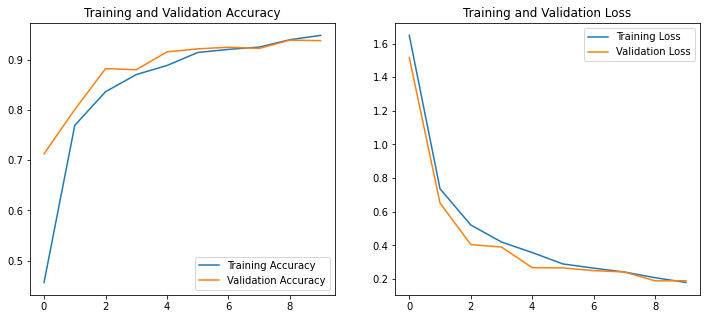

In [32]:
diplay_train_history(basic_model.history)

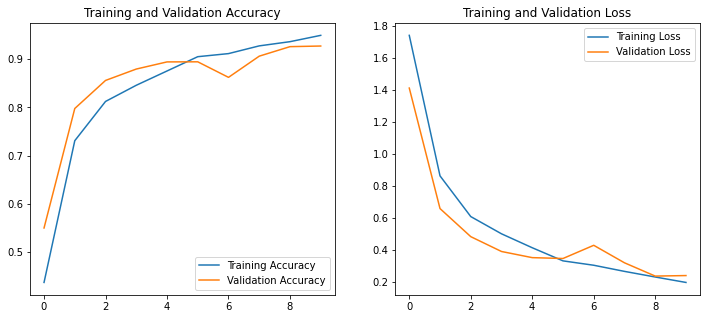

In [33]:
diplay_train_history(skip_connection_model.history)

- ÌôïÏù∏Í≤∞Í≥º overfittingÏùÄ ÎêòÏßÄ ÏïäÏïòÏßÄÎßå training lossÏôÄ test lossÍ∞Ä Í∞ôÏù¥ Í∞êÏÜåÌïòÎäî Ï∂îÏÑ∏Í∞Ä ÎÑàÎ¨¥ ÎöúÎ†∑ÌïòÏó¨ underfittingÏù¥ ÏùòÏã¨ÎêúÎã§.

## Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
---

### Evaluation

In [34]:
basic_model.evaluate(test_dataset, steps=(test_spec.shape[0] // batch_size))

312/312 [==============================] - 5s 17ms/step - loss: 0.1902 - accuracy: 0.9375
loss value: 0.190
accuracy value: 93.7500%


In [36]:
skip_connection_model.evaluate(test_dataset, steps=(test_spec.shape[0] // batch_size))

312/312 [==============================] - 5s 16ms/step - loss: 0.2399 - accuracy: 0.9274
loss value: 0.240
accuracy value: 92.7384%


- evaluation Í≤∞Í≥º, Îëê Î™®Îç∏ Í∞ÅÍ∏∞ 93%, 92%Ïùò Ï†ïÌôïÎèÑÎ•º Î≥¥ÏòÄÎã§.

### Model Test

In [120]:
inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_spec), size=1, replace=False)

batch_xs = test_spec[batch_index]
batch_ys = test_label[batch_index]
y_pred = basic_model.model(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))
batch_xs = batch_xs.reshape([130, 126])
batch_xs = spec2wav(batch_xs)
ipd.Audio(batch_xs, rate=8000)

label :  right


In [121]:
print("y_pred: " + str(inv_label_value[np.argmax(y_pred)]))

y_pred: right


- ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Ïã§Ï†ú ÎùºÎ≤®Ïù¥ Í∞ôÏùåÏùÑ ÌôïÏù∏ÌïòÏó¨ ÏòàÏ∏°Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏûëÎèôÌïòÍ≥† ÏûàÏùåÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏóàÎã§.

## Í≤∞Î°†
---

### ÏöîÏïΩ
- Î™©Ìëú : 2Ï∞®Ïõê Spectrogram Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•Î∞õÎäî classification Î™®Îç∏ÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ Î≤ÑÏ†ÑÍ≥º skip-connectionÏùÑ ÌôúÏö©Ìïú Î≤ÑÏ†Ñ ÎëêÍ∞ÄÏßÄÎ°ú Íµ¨ÌòÑÌï¥ Î≥∏Îã§.
- ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâ Í≥ºÏ†ï
    - Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
        - [Ï∫êÍ∏Ä ÏùåÏÑ±Ïù∏Ïãù Ï±åÎ¶¨ÏßÄ Îç∞Ïù¥ÌÑ∞](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge)Î•º Îã§Ïö¥Î°úÎìú Î∞õÎäîÎã§.
        - Îç∞Ïù¥Î•º ÏùåÏÑ±(wave)ÏôÄ ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ÌïúÎã§.
        - ÏùåÏÑ± Îç∞Ïù¥ÌÑ∞Î•º 2Ï∞®ÏõêÏùò spectogramÏúºÎ°ú Î≥ÄÌôòÏãúÌÇ®Îã§.
    - Î™®Îç∏ ÏÑ§Í≥Ñ/ÌõàÎ†® : 2D convoluction layerÏôÄ 2D MaxPoolingÏùÑ ÌòºÌï©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÏÑ§Í≥ÑÌïúÎã§. Ïù¥Îïå, skip-connectionÏùÑ Ìè¨Ìï®ÌïòÎäî Î™®Îç∏Í≥º Í∑∏Î†áÏßÄ ÏïäÏùÄ Î™®Îç∏ ÎëêÍ∞úÎ•º Ï†ïÏùòÌïúÎã§. Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇ§Í≥† accuracyÏôÄ lossÎ•º Íµ¨ÌïúÎã§. Ïù¥Îïå, accuarcyÏôÄ lossÎ•º Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥Ïñ¥ Ï∂îÏù¥Î•º ÌôïÏù∏ÌïúÎã§.
    - ÌèâÍ∞Ä : evaluationÏùÑ ÌÜµÌïòÏó¨ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïúÎã§.

### ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∞Ä

1. ÏùåÏÑ±Îç∞Ïù¥ÌÑ∞Î•º 2Ï∞®Ïõê Spectrogram ÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨ÏÑ±ÌïòÏòÄÎäîÍ∞Ä? Ïä§ÌéôÌä∏Î°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî Î∞è train/test Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïù¥ Ï†ïÏÉÅÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?
    - ÏùåÏÑ± Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê SpectogramÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏóê ÏÑ±Í≥µÌïòÏòÄÍ≥† spectogram ÏãúÍ∞ÅÌôîÏóê ÏÑ±Í≥µÌïòÏòÄÎã§. train/test Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ 4:1 ÎπÑÏú®Î°ú Íµ¨ÏÑ±ÌïòÏòÄÎã§.
2. 1,2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî ÏùåÏÑ±Ïù∏Ïãù Î™®Îç∏Ïù¥ Ï†ïÏÉÅ ÏûëÎèôÌïòÏòÄÎäîÍ∞Ä? Ïä§ÌéôÌä∏Î°úÍ∑∏Îû®ÏùÑ ÏûÖÎ†•Î∞õÏùÄ Î™®Îç∏Ïù¥ ÌïôÏäµÍ≥ºÏ†ïÏóêÏÑú ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÎ©∞, evaluation/test Îã®Í≥ÑÎ•º Î¨¥Î¶¨ÏóÜÏù¥ ÏßÑÌñâÍ∞ÄÎä•ÌïòÏòÄÎäîÍ∞Ä?
    - spectogramÏùÑ ÏûÖÎ†• Î∞õÎäî ÏùåÏÑ±Ïù∏Ïãù Î™®Îç∏Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏûëÎèôÌïòÏòÄÎã§. 
3. ÌÖåÏä§Ìä∏ÏÖã ÏàòÌñâÍ≤∞Í≥º ÏùåÏÑ±Ïù∏Ïãù Î™®Îç∏Ïùò AccuracyÍ∞Ä ÏùºÏ†ï ÏàòÏ§ÄÏóê ÎèÑÎã¨ÌïòÏòÄÎäîÍ∞Ä? evaluation Í≤∞Í≥º 75% Ïù¥ÏÉÅÏùò Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±ÌïòÎäî Î™®Îç∏Ïù¥ ÌïòÎÇò Ïù¥ÏÉÅ Ï°¥Ïû¨ÌïòÎäîÍ∞Ä?
    - evaluation Í≤∞Í≥º, Îëê Î™®Îç∏ Í∞ÅÍ∏∞ 93%, 92%Ïùò Ï†ïÌôïÎèÑÎ•º Î≥¥ÏòÄÎã§.

### ÌöåÍ≥†
- Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Ïùò ÏüÅÏ†êÏùÄ gpu Í¥ÄÎ¶¨ÏòÄÎã§. Ï¥àÎ∞òÏóê trainÏùÑ Ïò¨Î¶¨Í∏∞Îßå ÌïòÎ©¥ Ïª§ÎÑêÏù¥ Ï£ΩÏñ¥ Î™®Îç∏ ÌïôÏäµÏùÑ ÏãúÏûëÏ°∞Ï∞® Ìï† Ïàò ÏóÜÏóàÎã§. ÏõêÏù∏ÏùÄ tensorflowÏóêÏÑú gpuÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† cpuÎ•º ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎã§Îäî Í≤ÉÏù¥ÏóàÎã§. ÌôïÏù∏Í≤∞Í≥º tensorflow-gpu Ìå®ÌÇ§ÏßÄÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïòÍ≥† Ïù¥Î•º Ï†ïÏ†ïÌïòÍ≥†ÎÇú ÌõÑ Î™®Îç∏ ÌïôÏäµÏùÑ ÏãúÏûëÌï† Ïàò ÏûàÏóàÎã§. Ïù¥ÌõÑÎ°úÎèÑ Ï¢ÖÏ¢Ö gpuÏôÄ Ïª§ÎÑêÏùò Ï∫êÏãúÎ¨∏Ï†úÎ°ú Ïª§ÎÑêÏù¥ Ï£ΩÏñ¥Î≤ÑÎ¶¨Îäî Í≤ΩÏö∞Í∞Ä Î∞úÏÉùÌïòÏòÄÎäîÎã§. Ïª§ÎÑêÏùÑ Ï†ÅÏ†àÌûà Ïû¨Î∂ÄÌåÖÌï¥Ï£ºÍ≥† code collectionÏóê Ï†ïÏùòÌïú init_gpu Ìï®ÏàòÎ•º ÌÜµÌïòÏó¨ gpu Ï¥àÍ∏∞ÌôîÎ•º ÏßÑÌñâÌï¥Ï£ºÎäî Í≤ÉÏúºÎ°ú Ìï¥Í≤∞ Ìï† Ïàò ÏûàÏóàÎã§.

## Code Collection
---

#### import packages

In [1]:
from tensorflow.keras import layers
import os
import tensorflow as tf
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from abc import *
from pathlib import Path

workspace_path = os.getenv("HOME")+'/workspace/aiffel-exploation-workspace/E05_spectrogram_classification'

#### load_data

In [2]:
def load_data():
    data_path = workspace_path + '/data/speech_wav_8000.npz'
    speech_data = np.load(data_path)
    return speech_data

#### wav2spec

In [3]:
def wav2spec(wav, fft_size=258): # spectrogram shapeÏùÑ ÎßûÏ∂îÍ∏∞ÏúÑÌï¥ÏÑú size Î≥ÄÌòï
    D = np.abs(librosa.stft(wav, n_fft=fft_size))
    return D

#### spec2wav

In [4]:
def spec2wav(spec): # spectrogram shapeÏùÑ ÎßûÏ∂îÍ∏∞ÏúÑÌï¥ÏÑú size Î≥ÄÌòï
    D = np.abs(librosa.istft(spec))
    return D

#### play

In [5]:
import IPython.display as ipd

def play(x, label):
    print("label : ", label)
    ipd.Audio(x, rate=8000)

#### show_spectrogram

In [6]:
def show_spectrogram(spec):
    librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), x_axis='time')
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.xticks(range(0, 1))
    plt.tight_layout()
    plt.show()

#### get_label_data

In [7]:
def get_label_data(label_vals):
    target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
    others = ['unknown', 'silence']
    label_value = target_list + others

    new_label_value = dict()
    for i, l in enumerate(label_value): new_label_value[l] = i
    label_value = new_label_value

    label_data = np.array([ label_value[v[0]] for v in label_vals ])
    return label_value, label_data

#### model : abstract class

In [8]:
class Model(metaclass=ABCMeta):
    def __init__(self, batch_size, max_epochs, checkpoint_dir):
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.checkpoint_dir = checkpoint_dir
        self.input_data_shape = (130, 126, 1)
        self.model = None
        self.cp_callback = tf.keras.callbacks.ModelCheckpoint(
                                checkpoint_dir,
                                save_weights_only=True,
                                monitor='val_loss',
                                mode='auto',
                                save_best_only=True,
                                verbose=1)
        self.is_model_trained = False
        
    @abstractmethod
    def set_model(self):
        pass
    
    def compile_model(self):
        optimizer = tf.keras.optimizers.Adam(1e-4)
        self.model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                           optimizer=optimizer,
                           metrics=['accuracy'])
        
    def train(self, train_dataset, val_dataset, steps):
        self.history = self.model.fit(train_dataset, epochs=self.max_epochs,
                            steps_per_epoch=steps,
                            validation_data=val_dataset,
                            validation_steps=steps,
                            callbacks=[self.cp_callback])
        self.is_model_trained = True
    
    def evaluate(self, test_dataset, steps):
        result = None
        
        if self.is_model_trained:
            result = self.model.evaluate(test_dataset, steps=steps)
        elif os.path.isfile(self.checkpoint_dir):
            self.model.load_weights(self.checkpoint_dir)
            result = self.model.evaluate(test_dataset, steps=steps)
            
        if result != None:
            print("loss value: {:.3f}".format(result[0]))
            print("accuracy value: {:.4f}%".format(result[1]*100))
        else :
            print("train this model first üôè")

#### diplay_train_history

In [9]:
import matplotlib.pyplot as plt

def diplay_train_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

#### get_dataset

In [10]:
def one_hot_label(wav, label):
    label = tf.one_hot(label, depth=12)
    return wav, label

In [11]:
def get_dataset(X, y, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.map(one_hot_label)
    dataset = dataset.repeat().batch(batch_size=batch_size)
    return dataset

#### init_gpu

In [3]:
def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
      try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
          tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
      except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [2]:
%config Completer.use_jedi = False